### Weight initialization technique:
1. Xavier/Glorot

2. He Initialization





### Xavier/Glorot
-> used tanh/sigmoid activation function in hidden layers

-> for tanh activation function we get a better performance

-> Has two formula
1. Normal
2. Uniform

Today's tutorial we apply 'Xavier/Glorot uniform' technique

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/ushape.csv')

In [4]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


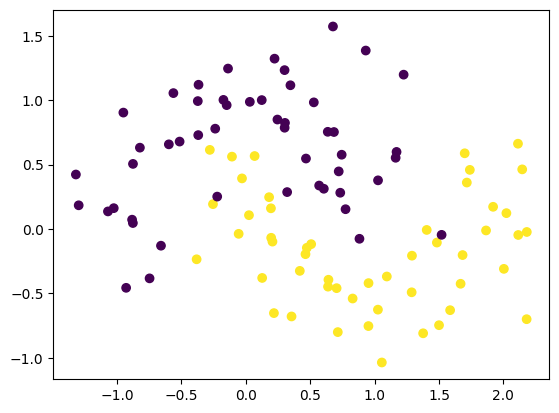

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

used 'glorot_uniform' for weights initialization

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.25609452, -0.13581789,  0.28254014,  0.5600088 , -0.53508675,
         -0.30075166, -0.5578255 ,  0.00767261,  0.42671472, -0.6292799 ],
        [ 0.26846445, -0.44078842, -0.52253306, -0.2027582 , -0.49662727,
          0.35220963,  0.27280104, -0.2231443 , -0.11573339,  0.48011512]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.06130964,  0.19946182,  0.28530115,  0.2678569 , -0.03115249,
          0.44991755, -0.33986244,  0.07225376, -0.3801858 , -0.46900445],
        [-0.4992196 , -0.35827821, -0.3069846 , -0.2782267 ,  0.36948   ,
         -0.5072288 ,  0.26902854, -0.25617403, -0.11392221,  0.33978266],
        [ 0.46245682,  0.29496562, -0.17690915, -0.27364242,  0.23455596,
         -0.5410814 , -0.1522646 ,  0.39390856,  0.02834189, -0.39804673],
        [-0.46554115,  0.29830867, -0.2877145 ,  0.04421151,  0.2646382 ,
          0.13880104,  0.5081458 , -0.11089429,  0.24595165,  0.06511927],
        [ 0.42234

In [12]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.2242 - loss: 0.8404 - val_accuracy: 0.1500 - val_loss: 0.8568
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3078 - loss: 0.7885 - val_accuracy: 0.1500 - val_loss: 0.8118
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3547 - loss: 0.7580 - val_accuracy: 0.2000 - val_loss: 0.7680
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4141 - loss: 0.7294 - val_accuracy: 0.3500 - val_loss: 0.7262
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5266 - loss: 0.6917 - val_accuracy: 0.5500 - val_loss: 0.6877
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7328 - loss: 0.6660 - val_accuracy: 0.8000 - val_loss: 0.6513
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8266 - loss: 0.6365 - val_accuracy: 0.9500 - val_loss: 0.6172
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8031 - loss: 0.6110 - val_accuracy: 0.9000 - val_loss

In [14]:
model.get_weights()

[array([[ 0.29252592, -0.17400293,  0.2538085 ,  0.45900375, -0.5304722 ,
         -0.35442436, -0.5117298 ,  0.07050472,  0.39500156, -0.54504645],
        [ 0.23097256, -0.37960166, -0.4778798 , -0.18354571, -0.56142235,
          0.45154056,  0.373488  , -0.3009467 , -0.22536063,  0.45661938]],
       dtype=float32),
 array([ 0.07137333, -0.09696645,  0.00116682, -0.08619311,  0.06726685,
         0.05602987,  0.05296724,  0.04959904, -0.06091916,  0.00566593],
       dtype=float32),
 array([[ 0.09629547,  0.21530025,  0.31214717,  0.24119341,  0.01520335,
          0.45243979, -0.35432112,  0.05700105, -0.37630457, -0.4215055 ],
        [-0.44914195, -0.38214248, -0.24992913, -0.18321058,  0.27007693,
         -0.44800928,  0.331187  , -0.18113033, -0.05173323,  0.37287894],
        [ 0.5689235 ,  0.2631918 , -0.10465716, -0.20636192,  0.17730674,
         -0.52011967, -0.07063232,  0.4691083 ,  0.09562345, -0.2873839 ],
        [-0.3877819 ,  0.27018404, -0.22707444,  0.07760285, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

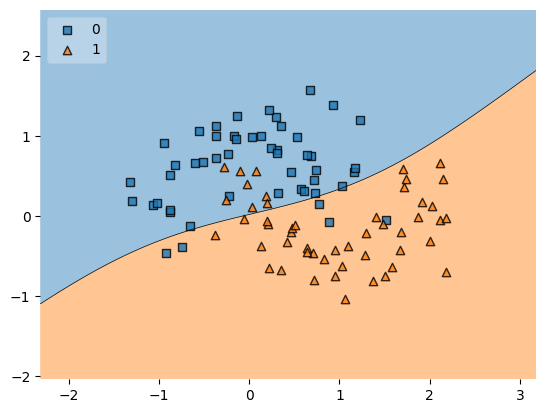

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=model,legend=2)